## PROYECTO  
  
OBJETIVO: Encontrar el perfil con mayor tasa de abandono para identificar el tipo de cliente al cual dirigir el marketing.

ÍNDICE DE GRÁFICOS

Figura 1. Porcentaje de clientes que se marcharon por PAÍS  
Figura 2. Porcentaje de clientes que se marcharon por PAÍS y GÉNERO   
Figura 3. Media del CREDIT SCORE por GÉNERO y PAÍS  
Figura 4. Boxplot de POINT EARNED  
Figura 5. Distribución de NÚMERO DE PRODUCTOS contratados  
Figura 6. Relación entre SALARIO, EDAD y TASA DE ABANDONO   
Figura 7. Distribución de antigüedad según abandono  
Figura 8. Número de clientes que se marcharon según QUEJAS y SATISFACCIÓN  
Figura 9. Comparación de quejas por género, edad y estado de queja


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\Flavio\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # POR SI LO UTILIZO
from sklearn.metrics import accuracy_score

In [41]:
data=pd.read_csv("Customer-Churn-Records.csv", sep=",")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


C:\Users\Flavio\AppData\Local\Temp\ipykernel_12332\989846882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_que_se_fueron.index, y=porcentaje_que_se_fueron.values, palette="magma")


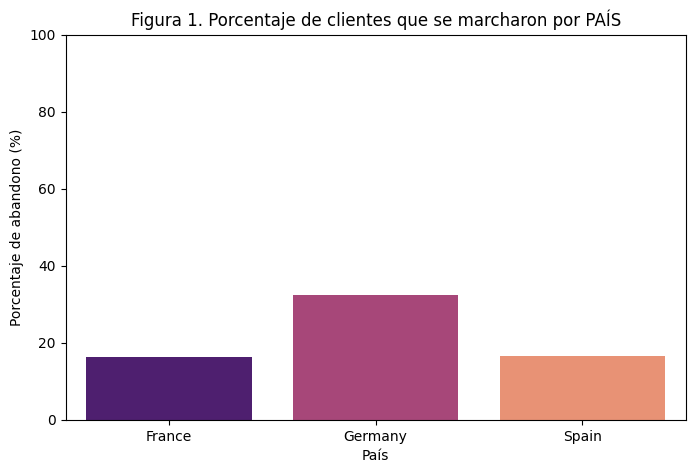


Porcentaje de abandono por país (de mayor a menor):

Geography
Germany    32.443204
Spain      16.673395
France     16.174711
Name: count, dtype: float64


In [42]:
total_clientes_por_pais = data['Geography'].value_counts()

clientes_que_se_fueron_por_pais = data[data['Exited'] == 1]['Geography'].value_counts()

porcentaje_que_se_fueron = (clientes_que_se_fueron_por_pais / total_clientes_por_pais) * 100

# GRAFICOOOOO
plt.figure(figsize=(8,5))
sns.barplot(x=porcentaje_que_se_fueron.index, y=porcentaje_que_se_fueron.values, palette="magma")
plt.title('Figura 1. Porcentaje de clientes que se marcharon por PAÍS')
plt.xlabel('País')
plt.ylabel('Porcentaje de abandono (%)')
plt.ylim(0, 100)  # De 0% a 100% para comparar mejor
plt.show()

# Ordenado de mayor a menor
print("\nPorcentaje de abandono por país (de mayor a menor):\n") #Salto de linea para que se vea mejor
print(porcentaje_que_se_fueron.sort_values(ascending=False))

De acuerdo a la información mostrada en la Figura 1, *Alemania es el país con la mayor tasa de abandono*, duplicando en valor tanto a Francia como España.

In [43]:
clientes_que_se_fueron = data[data['Exited'] == 1]
conteo_pais_genero = clientes_que_se_fueron.groupby(['Geography', 'Gender']).size().reset_index(name='Cantidad') #Size para contar el número de filas en cada grupo

print(conteo_pais_genero)

  Geography  Gender  Cantidad
0    France  Female       460
1    France    Male       351
2   Germany  Female       448
3   Germany    Male       366
4     Spain  Female       231
5     Spain    Male       182


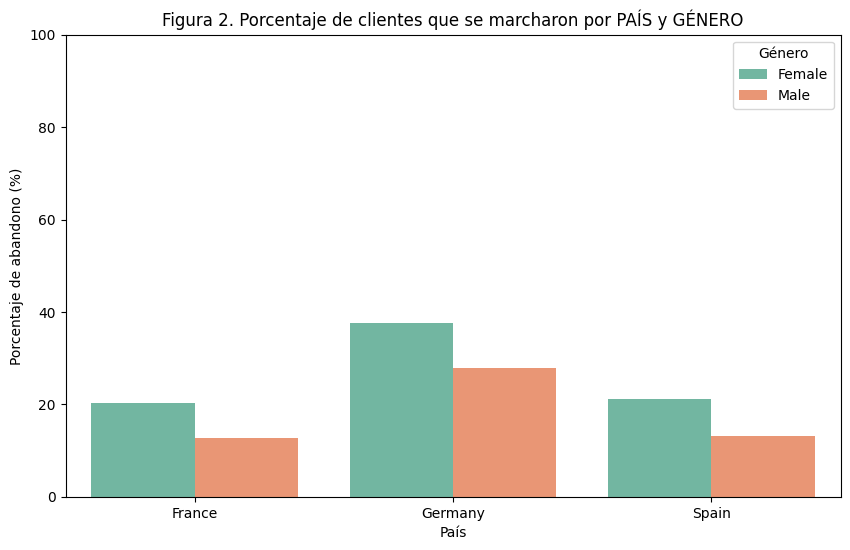


Tabla de porcentaje de abandono por país y género:

  Geography  Gender  Total  Se_fueron  Porcentaje_fuga
2   Germany  Female   1193        448        37.552389
3   Germany    Male   1316        366        27.811550
4     Spain  Female   1089        231        21.212121
0    France  Female   2261        460        20.344980
5     Spain    Male   1388        182        13.112392
1    France    Male   2753        351        12.749728


In [44]:
# 1. Total de clientes por país y género (TODOS, se hayan ido o no)
total_por_pais_genero = data.groupby(['Geography', 'Gender']).size().reset_index(name='Total')

# 2. Clientes que se han ido por país y género (solo Exited == 1)
clientes_que_se_fueron = data[data['Exited'] == 1]
fuga_por_pais_genero = clientes_que_se_fueron.groupby(['Geography', 'Gender']).size().reset_index(name='Se_fueron')

# 3. Unir ambas tablas
tabla = pd.merge(total_por_pais_genero, fuga_por_pais_genero, how='left', on=['Geography', 'Gender'])

# 4. Reemplazar valores NaN por 0 (por si no hay abandonos en algún grupo)
tabla['Se_fueron'] = tabla['Se_fueron'].fillna(0)

# 5. Calcular el porcentaje
tabla['Porcentaje_fuga'] = (tabla['Se_fueron'] / tabla['Total']) * 100

# 6. Visualizar en gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Geography', y='Porcentaje_fuga', hue='Gender', data=tabla, palette='Set2')
plt.title('Figura 2. Porcentaje de clientes que se marcharon por PAÍS y GÉNERO')
plt.xlabel('País')
plt.ylabel('Porcentaje de abandono (%)')
plt.ylim(0, 100)
plt.legend(title='Género')
plt.show()

# 7. (Opcional) Mostrar la tabla ordenada
print("\nTabla de porcentaje de abandono por país y género:\n")
print(tabla.sort_values('Porcentaje_fuga', ascending=False))

De acuerdo con la información presentada en la Figura 2, se confirma que Alemania es el país con la mayor tasa de abandono, tal como se había mencionado previamente. Además, se observa que las mujeres presentan una mayor propensión a abandonar el banco en comparación con los hombres, siendo el género femenino el que registra la tasa de abandono más alta en todos los países analizados. No obstante, para comprender mejor las causas de esta diferencia, es necesario profundizar en otras variables.

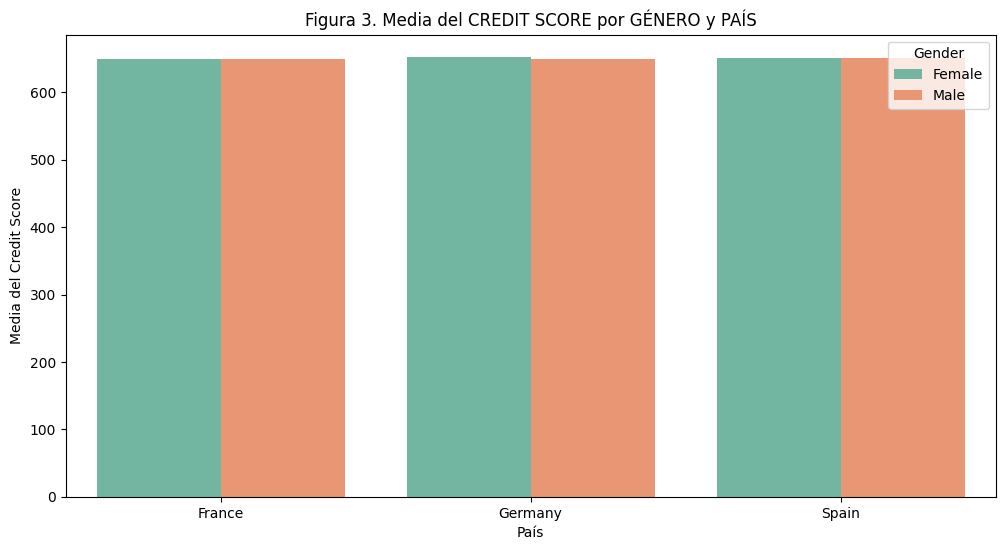


Media del Credit Score por GÉNERO y PAÍS:

  Geography  Gender  CreditScore
2   Germany  Female   653.093881
4     Spain  Female   651.769513
5     Spain    Male   650.992075
1    France    Male   650.064657
3   Germany    Male   649.966565
0    France  Female   649.185759


In [45]:
media_credito_por_genero_pais = data.groupby(['Geography', 'Gender'])['CreditScore'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Geography', y='CreditScore', hue='Gender', data=media_credito_por_genero_pais, palette='Set2')
plt.title('Figura 3. Media del CREDIT SCORE por GÉNERO y PAÍS')
plt.xlabel('País')
plt.ylabel('Media del Credit Score')
plt.show()

print("\nMedia del Credit Score por GÉNERO y PAÍS:\n")
media_credito_por_genero_pais = media_credito_por_genero_pais.sort_values(by='CreditScore', ascending=False)
print(media_credito_por_genero_pais)

Respecto al riesgo crediticio, el puntaje de crédito suele oscilar entre 300 y 850, donde valores más altos indican un menor riesgo para los prestamistas. En el presente análisis, no se observa una diferencia significativa entre géneros, lo que sugiere que tanto hombres como mujeres presentan niveles de solvencia crediticia muy similares.  
  
Puesto que el credit score no es una variable relevante, se analizarán otras variables para identificar que crea la diferencia de abandonos entre hombres y mujeres de alemania.

In [46]:
balances_altos = data.sort_values(by='Balance', ascending=False)

top_15_balances = balances_altos[['Geography', 'Gender', 'Balance', 'Exited']].head(15)
conteo_genero_top15 = top_15_balances['Gender'].value_counts()
conteo_pais_top15 = top_15_balances['Geography'].value_counts()

porcentaje_abandono_top10 = top_15_balances['Exited'].mean() * 100

print("\nTop 15 clientes con balances más altos:\n")
print(top_15_balances)

print(f"\nPorcentaje de abandono en el Top 15 de balances: {porcentaje_abandono_top10:.2f}%") #Esto no lo entiendo muy bien
print("\nDistribución por género en el Top 15 de balances:")
print(conteo_genero_top15)

print("\nDistribución por país en el Top 15 de balances:")
print(conteo_pais_top15)


Top 15 clientes con balances más altos:

     Geography  Gender    Balance  Exited
2092     Spain    Male  250898.09       1
3280    France  Female  238387.56       1
8733     Spain    Male  222267.63       1
3588     Spain    Male  221532.80       0
6717     Spain  Female  216109.88       1
1067   Germany    Male  214346.96       0
138      Spain  Female  213146.20       1
1533    France  Female  212778.20       0
3920   Germany    Male  212696.32       0
2709    France    Male  212692.97       0
8702    France    Male  212314.03       0
520     France  Female  211774.31       1
7353    France    Male  210433.08       1
720      Spain  Female  209767.31       1
8794     Spain  Female  209490.21       1

Porcentaje de abandono en el Top 15 de balances: 60.00%

Distribución por género en el Top 15 de balances:
Gender
Male      8
Female    7
Name: count, dtype: int64

Distribución por país en el Top 15 de balances:
Geography
Spain      7
France     6
Germany    2
Name: count, dtype: int

De acuerdo con la información presentada en el apartado anterior, entre los 15 clientes con mayor balance en el banco, el 60 % ha optado por abandonar la entidad; en el Top 10, este porcentaje disminuye ligeramente hasta el 50 %, aunque sigue representando una cifra significativa. Considerando la relevancia estratégica de estos clientes para el banco, resulta fundamental evaluar no solo la pérdida económica directa asociada a la salida de fondos, sino también el impacto que esto podría tener en la rentabilidad global de la entidad.
En este sentido, se hace necesario analizar qué tipo de clientes generan mayor rentabilidad para el banco, para lo cual se examinará tanto el número de productos contratados como los puntos acumulados por el uso de tarjetas de crédito.  

Hasta el momento, se pueden extraer las siguientes conclusiones principales:  
- El grupo de mujeres presenta una mayor propensión a abandonar el banco.
- Alemania registra la mayor tasa de abandono entre los países analizados.
- Los clientes con los balances más elevados presentan una alta tasa de abandono.
- Los clientes con mayores balances se concentran principalmente en Francia y España.



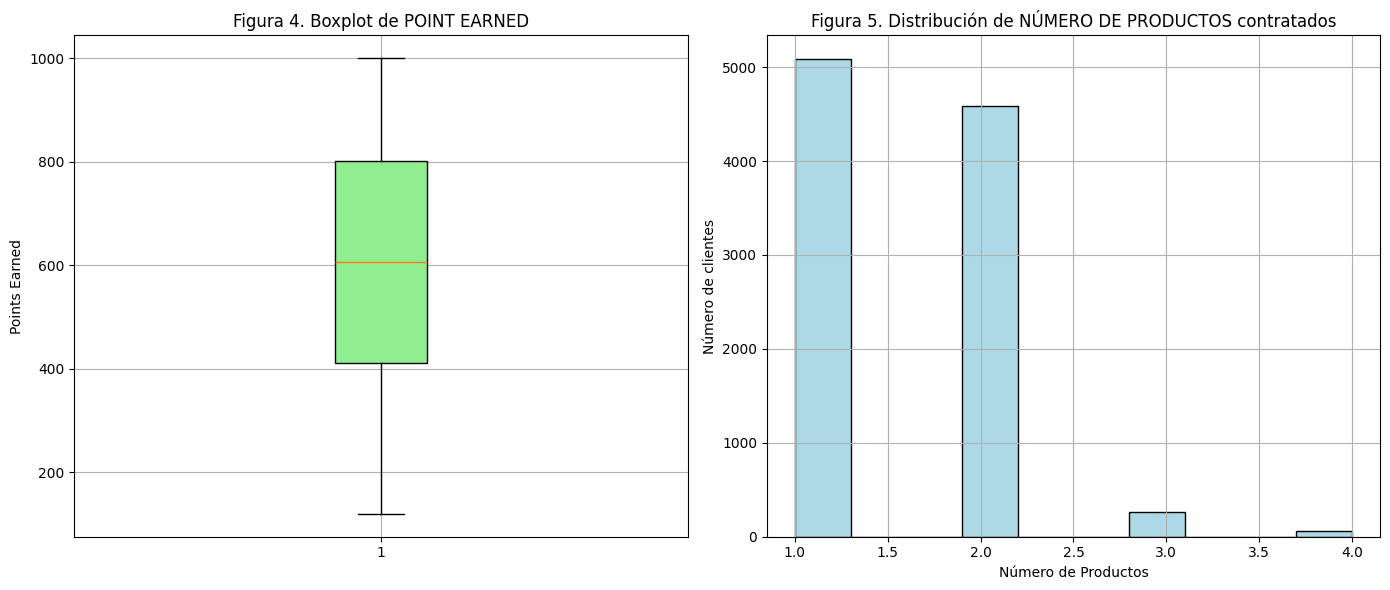

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Boxplot de Points Earned
axs[0].boxplot(data['Point Earned'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axs[0].set_title('Figura 4. Boxplot de POINT EARNED')
axs[0].set_ylabel('Points Earned')
axs[0].grid(True)

# Histograma de NumOfProducts
axs[1].hist(data['NumOfProducts'], bins=10, color='lightblue', edgecolor='black')
axs[1].set_title('Figura 5. Distribución de NÚMERO DE PRODUCTOS contratados')
axs[1].set_xlabel('Número de Productos')
axs[1].set_ylabel('Número de clientes')
axs[1].grid(True)

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [48]:
top_15_balances_2 = balances_altos[['Point Earned', 'NumOfProducts', 'Balance','Exited']].head(15)
top_15_balances_2

,Point Earned,NumOfProducts,Balance,Exited
2092,336,3,250898.09,1
3280,552,1,238387.56,1
8733,763,1,222267.63,1
3588,636,1,221532.80,0
6717,251,1,216109.88,1
1067,888,2,214346.96,0
138,814,1,213146.20,1
1533,661,1,212778.20,0
3920,327,1,212696.32,0
2709,232,1,212692.97,0


In [49]:
Media_productos_Top15=top_15_balances_2["NumOfProducts"].mean()
Media_Points_Top15=top_15_balances_2["Point Earned"].mean()

print(Media_productos_Top15)
print(Media_Points_Top15)

1.3333333333333333
564.4666666666667


La mayoría de los clientes contratan entre 1 y 2 servicios, lo mismo ocurre con los clientes que tienen los balances más altos en el banco. Esto pone de manifiesto que, aunque el banco genera ingresos a través de los productos vendidos, la pérdida económica directa debido al abandono de estos clientes es más relevante. En consecuencia, el banco debería centrarse en resolver esta problemática para retener tanto a los clientes VIP como al grupo de mujeres, quienes muestran una mayor propensión a abandonar la entidad.

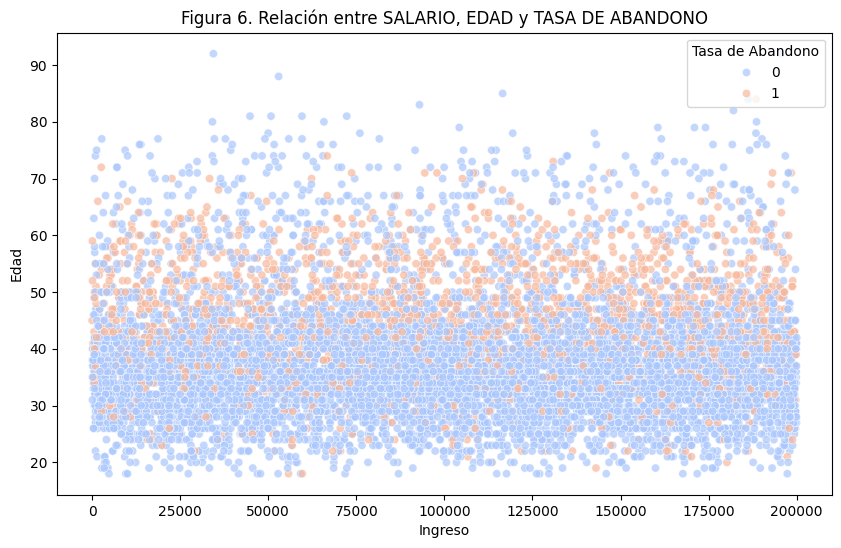

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='EstimatedSalary', y='Age', hue='Exited', palette='coolwarm', alpha=0.7)

plt.title('Figura 6. Relación entre SALARIO, EDAD y TASA DE ABANDONO')
plt.xlabel('Ingreso')
plt.ylabel('Edad')
plt.legend(title='Tasa de Abandono', loc='upper right')

plt.show()

En relación con la Figura 6, el gráfico de dispersión evidencia una tendencia creciente en la tasa de abandono conforme aumenta la edad de los clientes, con un punto de inflexión alrededor de los 70 años, a partir del cual la tasa disminuye. Este comportamiento sugiere que los clientes de entre 35 y 70 años, particularmente aquellos mayores de 50, presentan una mayor propensión a abandonar la entidad bancaria. Respecto a los ingresos, no se identifica una correlación significativa entre mayores niveles de renta y el aumento en la tasa de abandono.

En este hilo, de acuerdo con la información analizada el perfil con mayor tasa de abandono tiene las siguientes cualidades:
- Género: Mujer
- País: Alemania
- Credit Score: Irrelevante
- Número de productos: Entre 1 y 2
- Ingresos: Irrelevante.

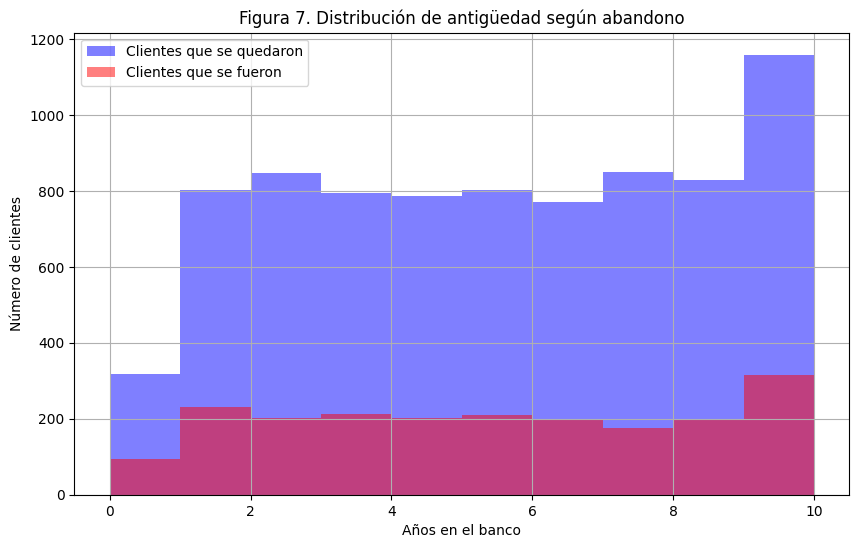

In [51]:
plt.figure(figsize=(10,6))

plt.hist(data[data["Exited"] == 0]["Tenure"], bins=10, alpha=0.5, label="Clientes que se quedaron", color="blue")

plt.hist(data[data["Exited"] == 1]["Tenure"], bins=10, alpha=0.5, label="Clientes que se fueron", color="red")

plt.title("Figura 7. Distribución de antigüedad según abandono")
plt.xlabel("Años en el banco")
plt.ylabel("Número de clientes")
plt.legend()
plt.grid(True)
plt.show()

Otra variable relevante es la antigüedad del cliente en el banco. De acuerdo con la Figura 7, la mayoría de los clientes opta por permanecer en la entidad, como se evidencia en la evolución del número de clientes, que se mantiene relativamente estable durante los primeros 10 años. A partir de ese punto, la diferencia entre quienes permanecen y quienes abandonan se amplía a favor de la permanencia. Esto sugiere que, superado el umbral de los 10 años, los clientes tienden a mostrar una mayor fidelidad hacia la entidad bancaria. Además, se observa que el número de nuevos clientes es reducido; sin embargo, aquellos que ingresan suelen mantenerse varios años, y, en particular, si superan los 10 años de antigüedad, la probabilidad de abandono disminuye significativamente.

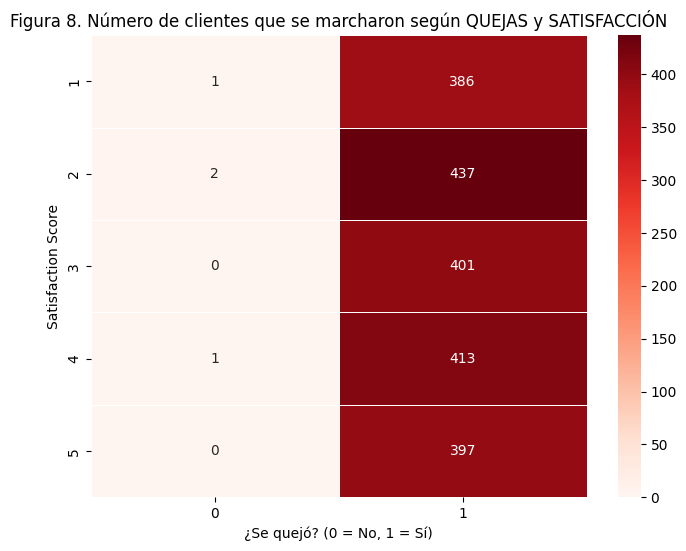

In [52]:
fuera = data[data["Exited"] == 1]

pivot = fuera.pivot_table(
    index="Satisfaction Score", 
    columns="Complain", 
    values="Exited", 
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot, 
    annot=True, 
    cmap="Reds", 
    fmt="d", 
    linewidths=0.5, 
    linecolor="white"
)
plt.title("Figura 8. Número de clientes que se marcharon según QUEJAS y SATISFACCIÓN")
plt.xlabel("¿Se quejó? (0 = No, 1 = Sí)")
plt.ylabel("Satisfaction Score")
plt.show()

C:\Users\Flavio\AppData\Local\Temp\ipykernel_12332\1875112210.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Flavio\AppData\Local\Temp\ipykernel_12332\1875112210.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


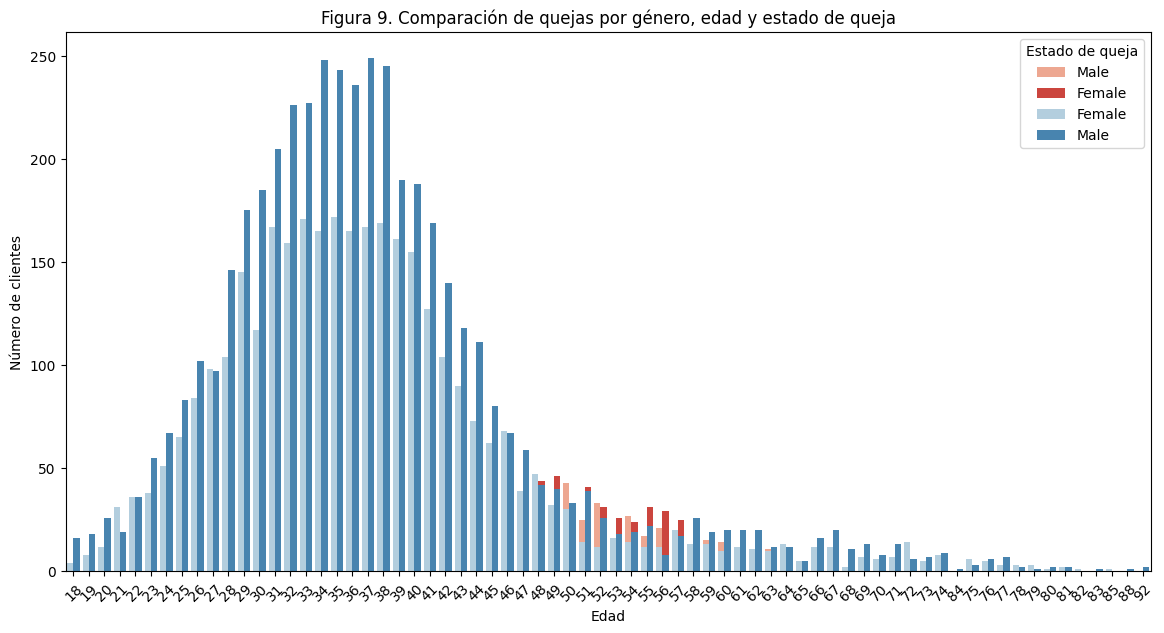

In [53]:
queja = data[data["Complain"] == 1]
sin_queja = data[data["Complain"] == 0]

# Contamos por género y edad si se quejaron o no
cuenta_queja = queja.groupby(["Gender", "Age"]).size().reset_index(name="Count")
cuenta_sin_queja = sin_queja.groupby(["Gender", "Age"]).size().reset_index(name="Count")

# Graficamos el conteo por género, edad y si se quejaron o no
plt.figure(figsize=(14, 7))

# Se crean las barras para los que se quejaron
sns.barplot(
    data=cuenta_queja, 
    x="Age", 
    y="Count", 
    hue="Gender", 
    ci=None, 
    palette="Reds"
)

# Se crean las barras para los que no se quejaron
sns.barplot(
    data=cuenta_sin_queja, 
    x="Age", 
    y="Count", 
    hue="Gender", 
    ci=None, 
    palette="Blues"
)

plt.title("Figura 9. Comparación de quejas por género, edad y estado de queja")
plt.xlabel("Edad")
plt.ylabel("Número de clientes")
plt.legend(title="Estado de queja")
plt.xticks(rotation=45)
plt.show()

Como se observa en la Figura 8, todos los clientes que se han quejado han terminado abandonando el banco, independientemente de su puntuación de satisfacción. Este patrón subraya la importancia de abordar eficazmente las quejas para evitar la fuga de clientes, ya que las inquietudes no resueltas parecen tener un impacto decisivo en su decisión de irse.  

En cuanto al perfil de los clientes que se marchan, como se mencionó anteriormente, suelen ser mujeres de entre 48 y 60 años. Aunque no se especifica la nacionalidad, es posible inferir que, en su mayoría, se trata de alemanas, basándonos en las tendencias observadas en los datos.  

Para reducir esta tasa de abandono, el banco debería priorizar el establecimiento de un departamento de resolución de quejas, con el fin de gestionar rápidamente los problemas de los clientes. Además, sería beneficioso diseñar servicios específicos dirigidos a mujeres mayores de 40 años, proporcionando atención personalizada y productos que se ajusten a sus necesidades. Esto no solo ayudaría a retener a este grupo demográfico, sino que también contribuiría a una mejora general en la satisfacción y fidelización de clientes.

